<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Cars Data Analysis EDA<p/>

<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Import Data and Libraries<p/>

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [233]:
df = pd.read_csv('CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Cleaning and Prepare<p/>

In [234]:
df.shape

(428, 15)

In [235]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [236]:
df.duplicated().sum()

0

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


1- Cylinders has two nall values

2- invoice and msrb is object should be float and remove $

In [238]:
df[df.Cylinders.isna()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [239]:
df.Cylinders.nunique()

7

In [240]:
df.Cylinders.value_counts()

Cylinders
6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: count, dtype: int64

In [241]:
df.Cylinders.fillna(df.Cylinders.median(),inplace=True)

In [242]:
df.iloc[247:249]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,6.0,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,6.0,238,18,24,3029,106,174


In [243]:
for col in df.columns:
    print(f'{col}:  {df[col].nunique()}')

Make:  38
Model:  425
Type:  6
Origin:  3
DriveTrain:  3
MSRP:  410
Invoice:  425
EngineSize:  43
Cylinders:  7
Horsepower:  110
MPG_City:  28
MPG_Highway:  33
Weight:  348
Wheelbase:  40
Length:  67


In [244]:
# Type of cars percentage wise distribution
df.Type.value_counts(normalize=True).round(2)*100

Type
Sedan     61.0
SUV       14.0
Sports    11.0
Wagon      7.0
Truck      6.0
Hybrid     1.0
Name: proportion, dtype: float64

In [245]:
# print 3 random rows
df.sample(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
185,Infiniti,FX35,Wagon,Asia,Rear,"$34,895","$31,756",3.5,6.0,280,16,22,4056,112,189
260,Mercedes-Benz,C32 AMG 4dr,Sedan,Europe,Rear,"$52,120","$48,522",3.2,6.0,349,16,21,3540,107,178
242,Mazda,Mazda3 s 4dr,Sedan,Asia,Front,"$17,200","$15,922",2.3,4.0,160,25,31,2762,104,179


In [246]:
df.MSRP = df.MSRP.str.replace('$','').str.replace(',','').astype('float64')
df.Invoice = df.Invoice.str.replace('$','').str.replace(',','').astype('float64')

In [247]:
df.MSRP.dtype,df.Invoice.dtype

(dtype('float64'), dtype('float64'))

In [248]:
df[['MSRP','Invoice']].describe()

,MSRP,Invoice
count,428.000000,428.000000
mean,32774.855140,30014.700935
std,19431.716674,17642.117750
min,10280.000000,9875.000000
25%,20334.250000,18866.000000
50%,27635.000000,25294.500000
75%,39205.000000,35710.250000
max,192465.000000,173560.000000


<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Visualization<p/>

In [249]:
fig = px.bar(df.Make.value_counts(),title='Manufacturer Make Distribution')
fig.update_traces(marker_color='#4C4C6D')
fig.show()

In [250]:
fig = px.bar(df.Type.value_counts().sort_values(),orientation='h', title='Car Type Distribution',text_auto=True)
fig.update_traces(marker_color='#4C4C6D')
fig.show()

In [251]:
fig = px.pie(values=df.Type.value_counts(),names=df.Type.value_counts().index,title='Car Type Distribution',
             hole=0.3,color_discrete_sequence=px.colors.diverging.Geyser)
fig.show()

In [252]:
fig = px.bar(df.Origin.value_counts().sort_values(),title='Cars Origin Distribution',orientation='h',text_auto=True)
fig.update_traces(marker_color='#4C4C6D')
fig.show()

In [253]:
fig = px.pie(values=df.Origin.value_counts(),names=df.Origin.value_counts().index,title='Car Origin Distribution',
             hole=0.3,color_discrete_sequence=px.colors.diverging.Tealrose)
fig.show()

In [254]:
msrp = df.groupby('Type')['MSRP'].mean().round(2)
fig = px.bar(msrp,title='Average MSRP By Car Type',text_auto=True)
fig.update_traces(marker_color='#4C4C6D')
fig.show()

In [255]:
msrp = df.groupby('Type')['MPG_City'].mean().round(2)
fig = px.bar(msrp,title='Average MPG_City By Car Type',text_auto=True)
fig.update_traces(marker_color='#4C4C6D')
fig.show()

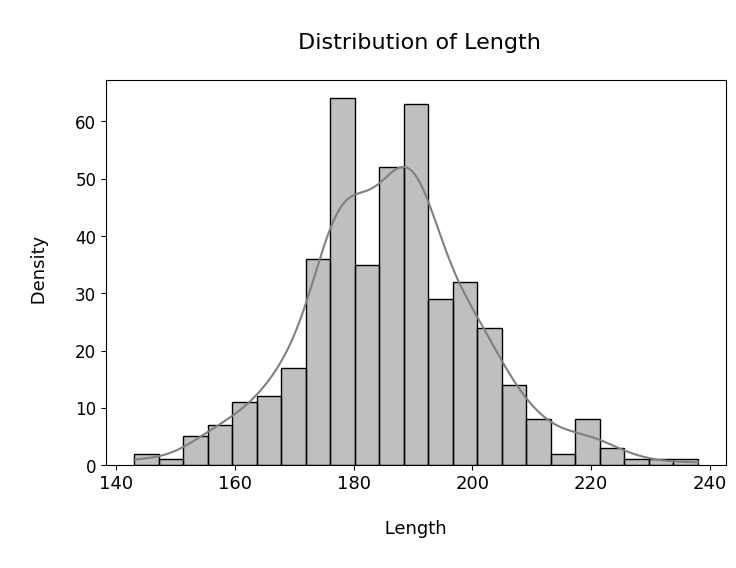

In [256]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Length\n', size=16, color='black')
plt.xlabel('\n Length \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Length,kde=True,color='grey')
plt.show()

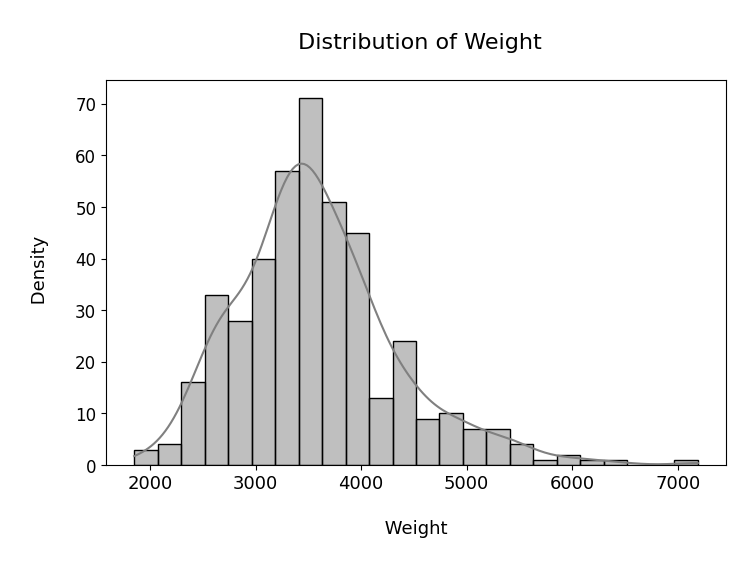

In [257]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Weight\n', size=16, color='black')
plt.xlabel('\n Weight \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Weight,kde=True,color='grey')
plt.show()

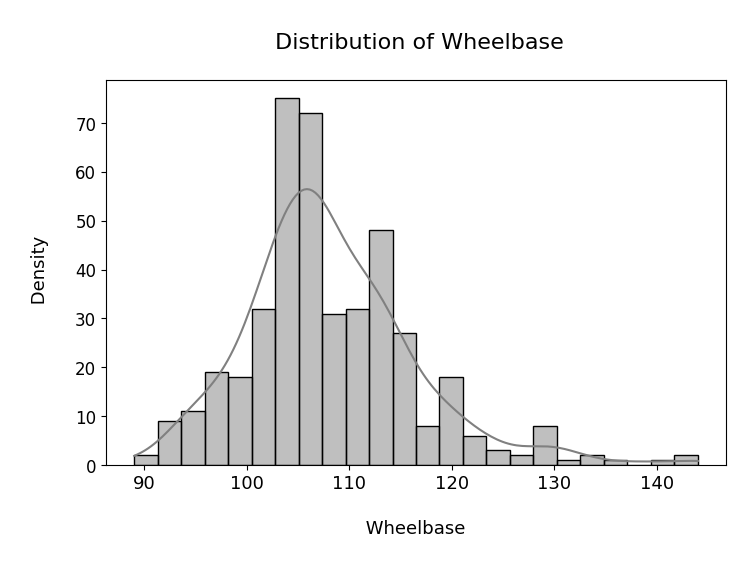

In [258]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Wheelbase\n', size=16, color='black')
plt.xlabel('\n Wheelbase \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Wheelbase,kde=True,color='grey')
plt.show()

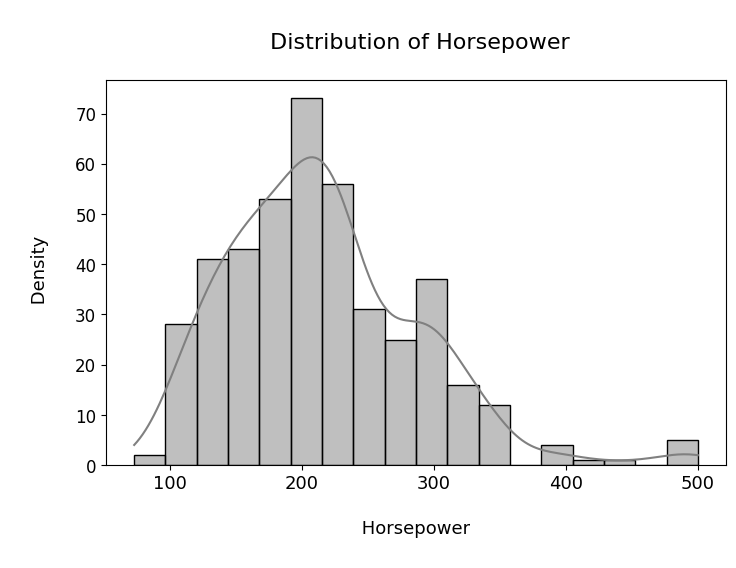

In [259]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Horsepower\n', size=16, color='black')
plt.xlabel('\n Horsepower \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Horsepower,kde=True,color='grey')
plt.show()

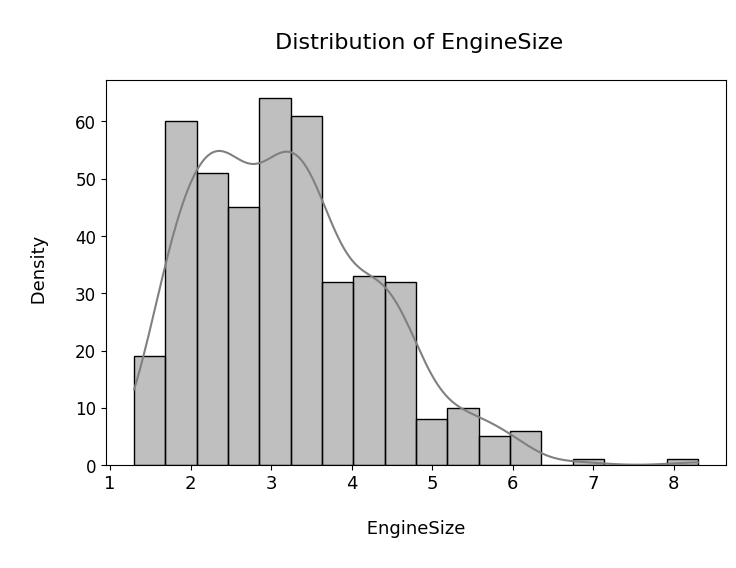

In [260]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of EngineSize\n', size=16, color='black')
plt.xlabel('\n EngineSize \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.EngineSize,kde=True,color='grey')
plt.show()

In [261]:
px.scatter(data_frame=df,x='Weight',y='MSRP',title='Weight & MSRP Relation')

In [263]:
corelation = df.select_dtypes(['int','float']).corr().round(1)
px.imshow(corelation,text_auto=True,height=800,color_continuous_scale=px.colors.diverging.Tealrose,
          title='HeatMap Feature Correlation')

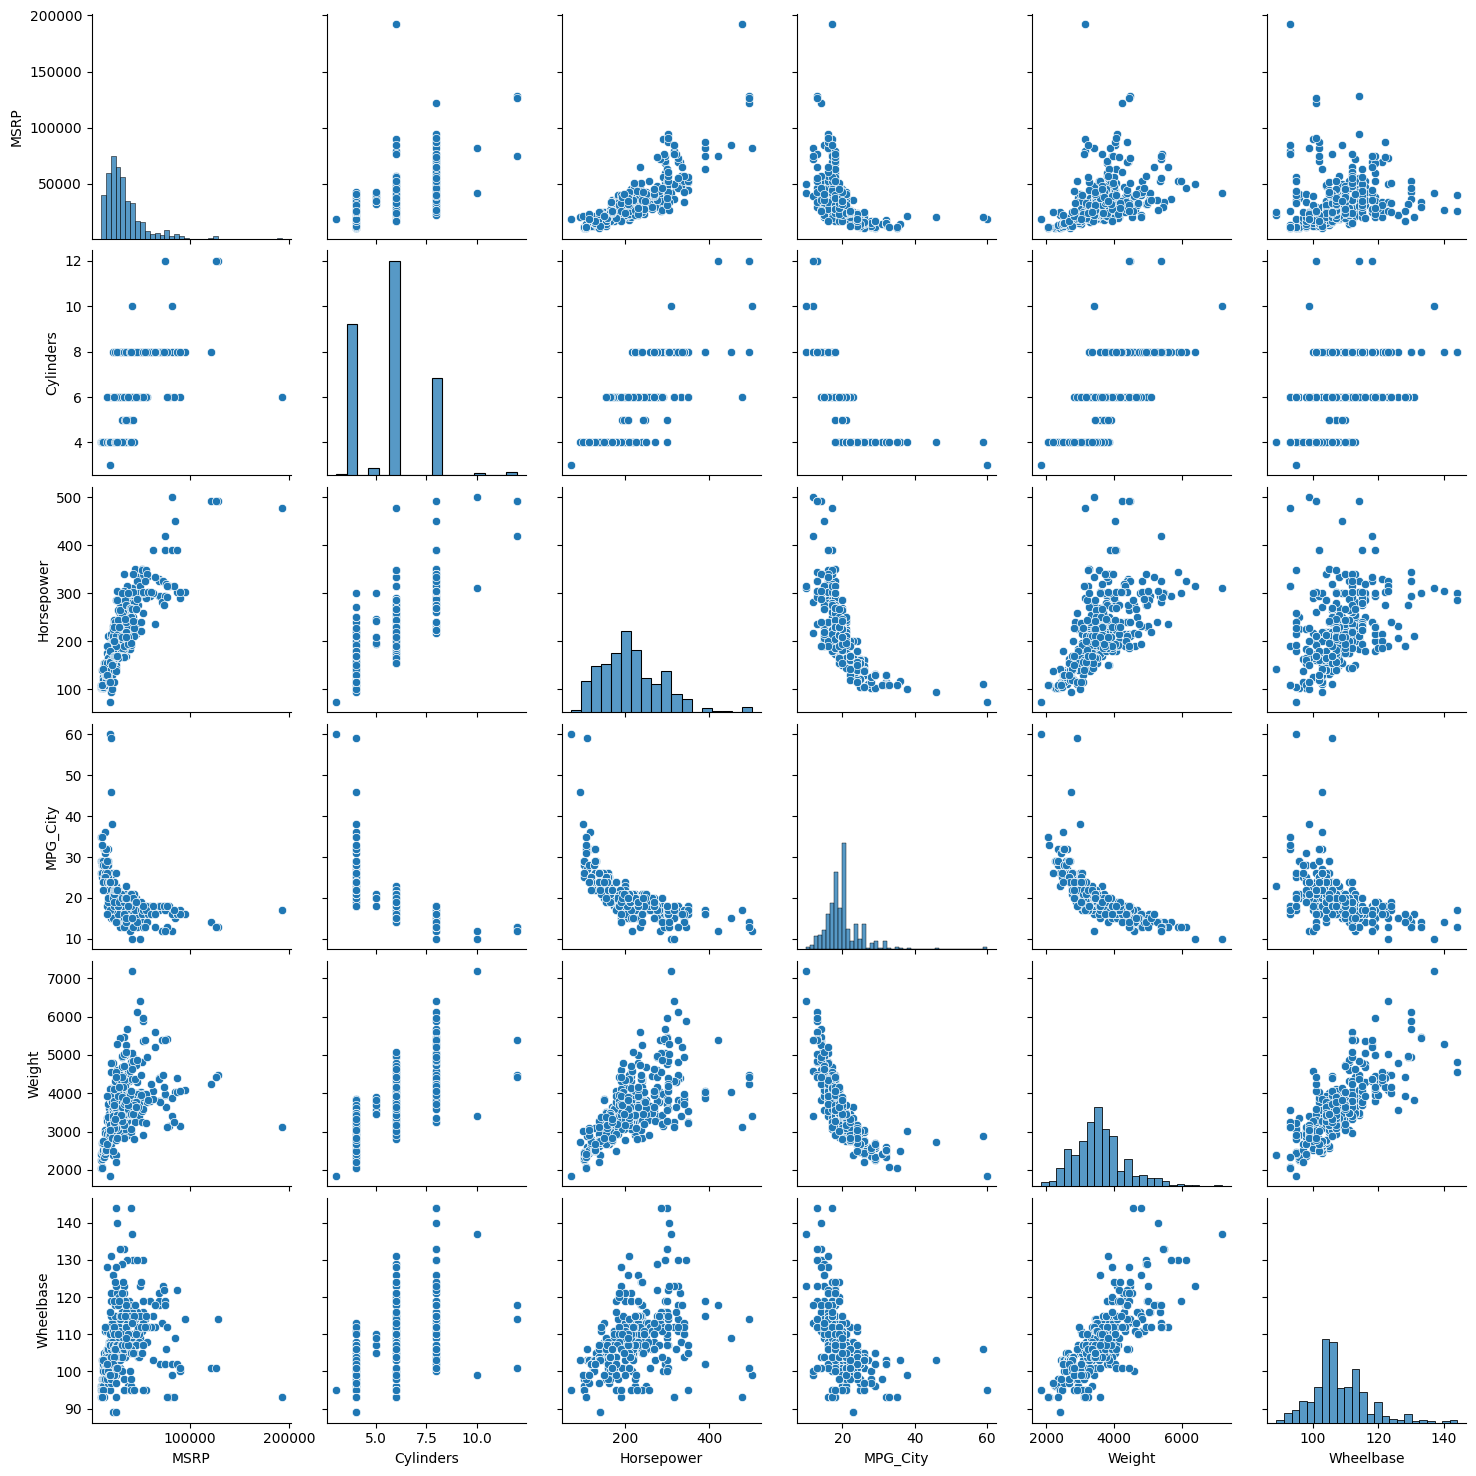

In [264]:
sns.pairplot(df.drop(columns=["Invoice","MPG_Highway","EngineSize","Length"]).select_dtypes(['int','float']))

 observation
 1. strong correlation between Invoice & MSRP

 2. strong correlation between MPG_Highway & MPG_City

 3. strong correlation between EngineSize & Cylinders

 4. strong correlation between Length & Wheelbase

 

In [265]:
# check heatmap corr graph, after removing strong correlation columns

corelation2 = df.drop(columns=["Invoice","MPG_Highway","EngineSize","Length"]).select_dtypes(['int','float']).corr().round(2)
px.imshow(corelation2,text_auto=True,height=800,color_continuous_scale=px.colors.diverging.Tealrose,
          title='Optimized HeatMap Feature Correlation')

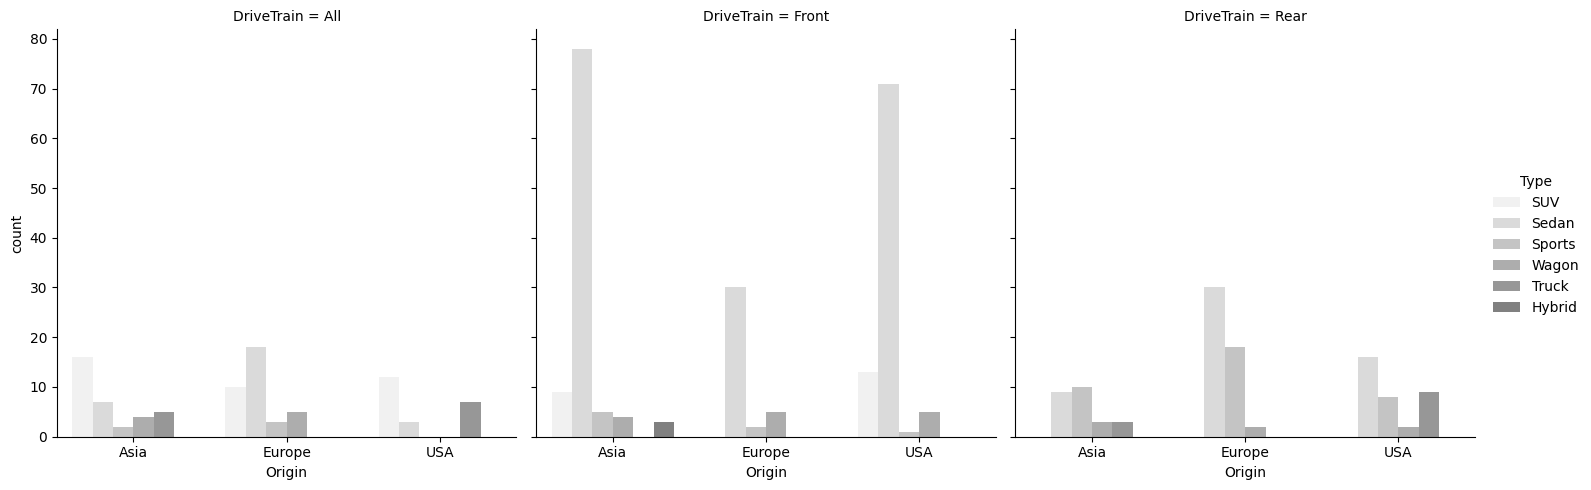

In [266]:
sns.catplot(data=df,x='Origin',hue='Type',col='DriveTrain',kind='count',color='grey')
plt.show()

In [267]:
px.bar(data_frame=df,x='Type',color='DriveTrain',barmode='group',title='Origin wise Car DriveTrain Distribution')

In [268]:
px.bar(data_frame=df,x='Origin',color='DriveTrain',barmode='group',title='Origin wise Car DriveTrain Distribution')

In [269]:
px.bar(data_frame=df,x='Origin',color='Type',barmode='group',title='Origin wise Car DriveTrain Distribution')

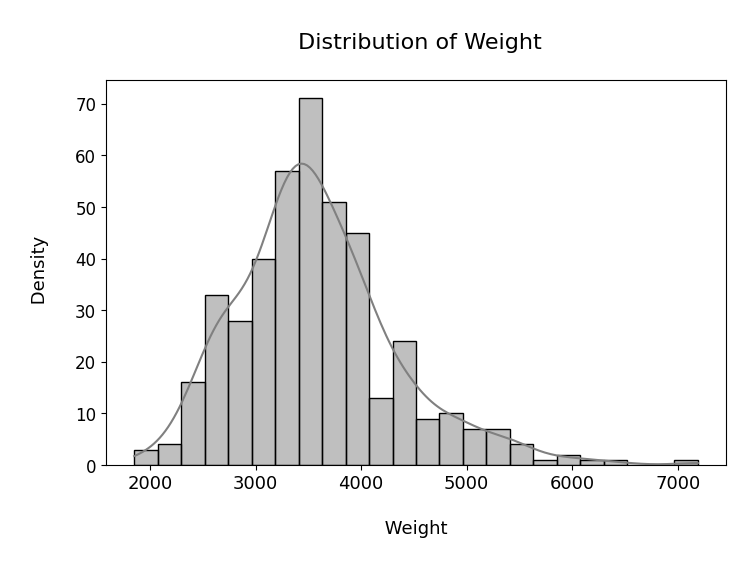

In [283]:
plt.figure(figsize=(8,5))
plt.title('\n Distribution of Weight\n', size=16, color='black')
plt.xlabel('\n Weight \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.histplot(df.Weight,kde=True,color='grey')
plt.show()

Text(0.5, 1.0, 'MPG_City by Car Type')

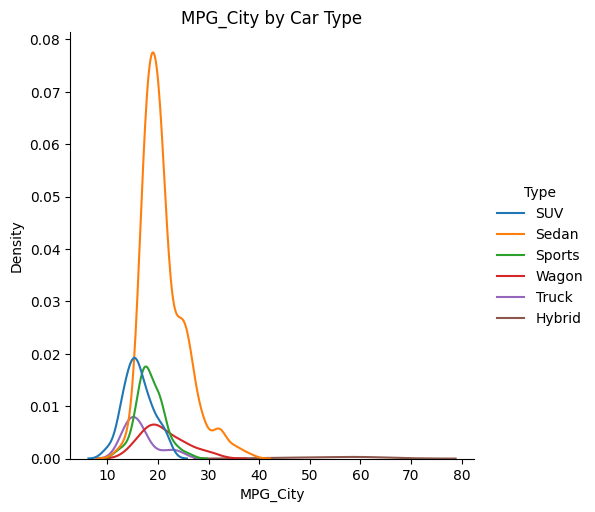

In [282]:
sns.displot(x=df.MPG_City,hue=df.Type, kind="kde")
plt.title('MPG_City by Car Type')


Text(0.5, 1.0, 'MPG_City by Car Origin')

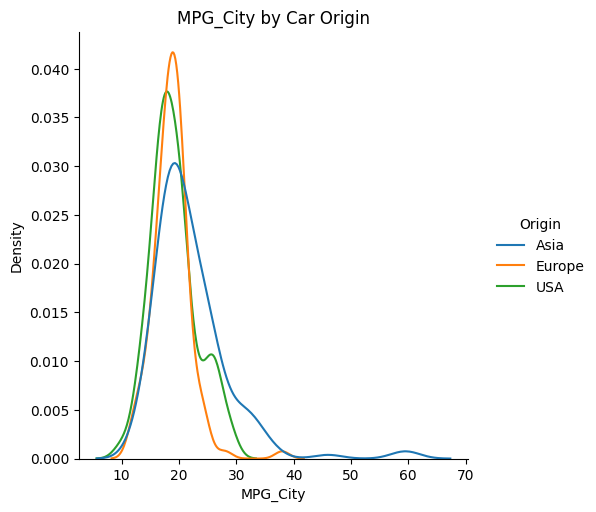

In [272]:
sns.displot(x=df.MPG_City,hue=df.Origin, kind="kde")
plt.title('MPG_City by Car Origin')


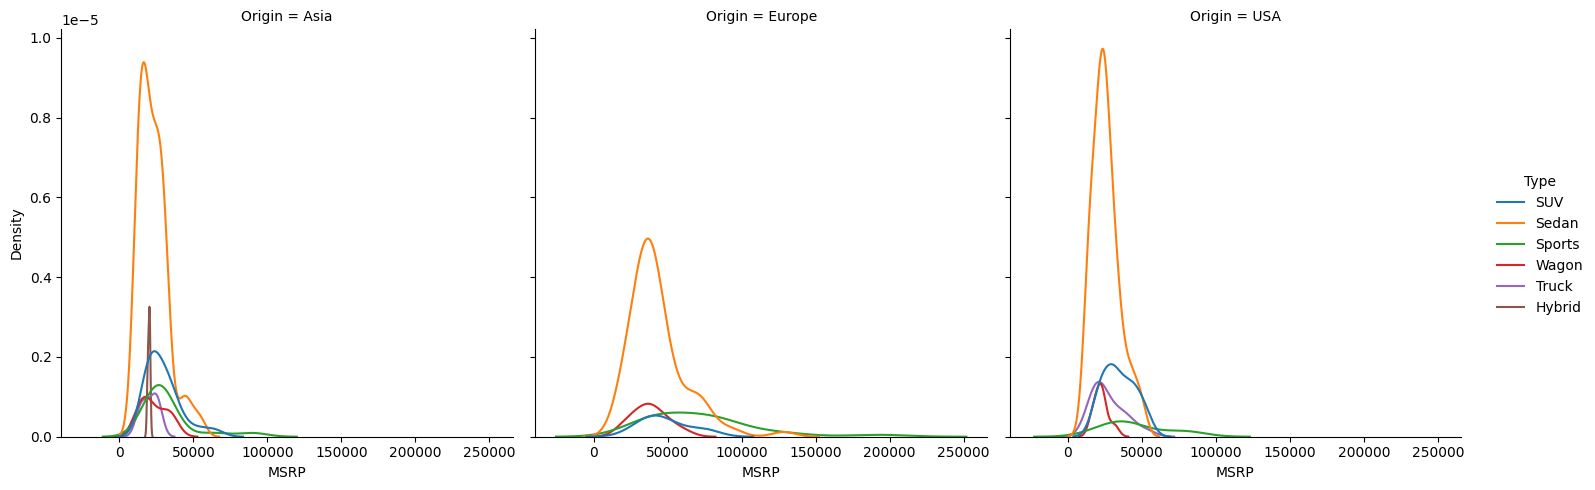

In [273]:
sns.displot(data=df, x="MSRP", hue="Type", col="Origin", kind="kde")


In [274]:
fig = px.box(df.Weight,color_discrete_sequence=['#4C4C6D'],title='Weight Distribution',orientation='h')
fig.show()

In [275]:
fig = px.box(df.MSRP,color_discrete_sequence=['#4C4C6D'],title='MSRP Distribution',orientation='h')
fig.show()

In [276]:
fig = px.box(df.Horsepower,color_discrete_sequence=['#4C4C6D'],title='Horsepower Distribution',orientation='h')
fig.show()

In [277]:
fig = px.box(df[['Wheelbase','MPG_City']],color_discrete_sequence=['#4C4C6D'],title='Horsepower Distribution',orientation='h')
fig.show()

In [284]:
fig = px.box(x=df.MSRP,y=df.Type,title='MSRP Distribution by Car Type',
             orientation='h',color_discrete_sequence=['#4C4C6D']
             )
fig.update_xaxes(title='MSRP')
fig.update_yaxes(title='Type')

fig.show()

In [279]:
fig = px.box(x=df.Origin,y=df.MSRP,title='MSRP Distribution  by Car Type each Origin',color=df.Type)
fig.update_xaxes(title='Origin')
fig.update_yaxes(title='MSRP')
fig.update_legends(title='Type')
fig.show()

In [280]:
topCom = df["Make"].value_counts().sort_values(ascending=False).head(10)
fig=px.bar(x= topCom.index ,
            y= topCom/742*100,text=[f"{value:.2f}%" for value in topCom/742*100],
            color_discrete_sequence=['#4C4C6D'],
            title='Top 10 Companies with Maximum Number of vehicle production')
fig.update_xaxes(title='Make')
fig.update_yaxes(title='Count')

<p style="background-color:#ED7B7B;color:white;text-align:center;font-size:30px;padding:10px 10px;font-weight:bold">Thank You<p/>